In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from collections import Counter
from nltk.tokenize import word_tokenize
import warnings
warnings.filterwarnings('ignore')


In [2]:
news=pd.read_csv('F:/Winter 2021/Machine Learning/Fake_News_Detection/news.csv')
news.shape


(6335, 4)

In [3]:
# Counting the number of REAL and FAKE values
Counter(news['label']) 

Counter({'FAKE': 3164, 'REAL': 3171})

In [4]:
#Splitting the data into training and testing data.

x_train,x_test,y_train,y_test=train_test_split(news['text'],news['label'],test_size=0.2)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5068,)
(1267,)
(5068,)
(1267,)


In [5]:
tfidf=TfidfVectorizer(stop_words='english',max_df=0.8)
x_train=tfidf.fit_transform(x_train)
x_test=tfidf.transform(x_test)
print(x_test.shape)
print(x_train.shape)

(1267, 61427)
(5068, 61427)


In [ ]:
#Random Forest Classifier

In [6]:
model4=RandomForestClassifier()
model4.fit(x_train,y_train)

RandomForestClassifier()

In [7]:
y_pred4=model4.predict(x_test)

In [8]:
acc4=accuracy_score(y_test,y_pred4)

In [9]:
labels={'RandomForestClassifier':acc4}
print(labels)
#print(str(model)+' : '+str(accuracy))

{'RandomForestClassifier': 0.9084451460142068}


In [11]:
print(f'Accuracy: {round(acc4*100,2)}%')

Accuracy: 90.84%


# Data Visualization  

Text(0.5, 1.0, 'Fake news')

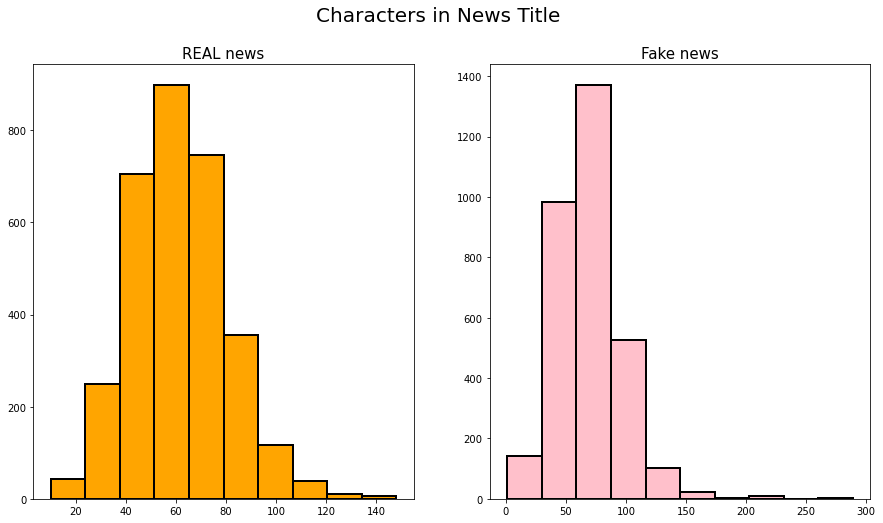

In [16]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(15,8))
fig.suptitle('Characters in News Title',fontsize=20)
news_len=news[news['label']=='REAL']['title'].str.len()
ax1.hist(news_len,color='orange',linewidth=2,edgecolor='black')
ax1.set_title('REAL news',fontsize=15)
news_len=news[news['label']=='FAKE']['title'].str.len()
ax2.hist(news_len,color='pink',linewidth=2,edgecolor='black')
ax2.set_title('Fake news',fontsize=15)